# Importing Libraries

In [1]:
# import libraries
import plotly.graph_objs as go
import plotly
from sklearn import metrics
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import re
import plotly.graph_objects as go
import pandas as pd
import nltk
import textblob
import plotly.express as px
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import plotly.express as px
import seaborn as sns
from sklearn import svm
plotly.offline.init_notebook_mode(connected=True)

# Reading the data from the csv file


In [2]:
#Combining new_dubai_1.csv , new_dubai_2 , new_dubai_3 with the similar table structure using pandas.concat()

df1 = pd.read_csv('new_dubai_1.csv')
df2 = pd.read_csv('new_dubai_2.csv')    
df3 = pd.read_csv('new_dubai_3.csv')
df4 = pd.read_csv('new_d33_1.csv'  )
df5 = pd.read_csv('new_d33_2.csv'  )    
df6 = pd.read_csv('new_d33_3.csv'  )
df7 = pd.read_csv('new_dubai_4.csv')
df8 = pd.read_csv('new_dubai_5.csv')

df = pd.concat([df1, df2, df3 , df4 , df5 , df6 , df7 , df8], ignore_index=True)
df.head()


,user_name,tweet_id,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,word
0,Drillz,1.640760e+18,"Lagos, Nigeria",NaN,2022-10-22 22:53:41+00:00,200,910,17676,False,2023-03-28 17:10:01+00:00,"RT @jiddarhmorh: Dubai Abaya\nPrice:17,000\nSi...",NaN,Twitter for iPhone,False,dubai
1,Herma Hulda,1.640760e+18,NaN,NaN,2023-02-25 22:30:34+00:00,13,22,0,False,2023-03-28 17:09:54+00:00,RT @spideycyp_155: Let there be light ~ @Binan...,NaN,Twitter Web App,False,dubai
2,𝐌𝐈𝐂𝐇𝐀𝐄𝐋𝐈𝐆𝐄𝐍𝐂𝐄,1.640760e+18,NaN,"Walking ambition, pure pleasure lover, dreamer.",2018-07-21 18:42:42+00:00,2788,2802,55854,False,2023-03-28 17:09:49+00:00,RT @milesautos: Ya Fav Dubai 🔌2019 Lexus RX350...,NaN,Twitter for Android,False,dubai
3,Kaliya,1.640760e+18,"Bilbao, Spain",*****************,2010-03-28 06:10:36+00:00,1139,3807,48604,False,2023-03-28 17:09:49+00:00,RT @Sydusm: Bolsonaro is hiding in US after fl...,NaN,Twitter for iPhone,False,dubai
4,Charehwa,1.640760e+18,NaN,NaN,2021-11-04 15:50:54+00:00,347,795,5436,False,2023-03-28 17:09:46+00:00,RT @ProfJNMoyo: ZED KOUDONARIS smelts gold sto...,NaN,Twitter for Android,False,dubai


In [3]:
df.shape

(11897, 15)

# Data Preprocessing

In [4]:
#create a new data frame and store tweet id and user_favorite 
df1 = df[['tweet_id','user_favourites']]
df1.head()
    

,tweet_id,user_favourites
0,1.640760e+18,17676
1,1.640760e+18,0
2,1.640760e+18,55854
3,1.640760e+18,48604
4,1.640760e+18,5436


In [5]:
#drop all zero values in user_favourites column
df1 = df1[df1.user_favourites != 0] 
#drop null values
df1.dropna(inplace=True)
df1.head()

,tweet_id,user_favourites
0,1.640760e+18,17676
2,1.640760e+18,55854
3,1.640760e+18,48604
4,1.640760e+18,5436
5,1.640760e+18,13601


In [6]:
# rename column created_at to date
df.rename(columns={'created_at':'Datetime'}, inplace=True)
df.rename(columns={'text':'Text'}, inplace=True)
df.rename(columns={'location': 'User Location'}, inplace=True)
df

,user_name,tweet_id,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,Text,hashtags,source,is_retweet,word
0,Drillz,1.640760e+18,"Lagos, Nigeria",NaN,2022-10-22 22:53:41+00:00,200,910,17676,False,2023-03-28 17:10:01+00:00,"RT @jiddarhmorh: Dubai Abaya\nPrice:17,000\nSi...",NaN,Twitter for iPhone,False,dubai
1,Herma Hulda,1.640760e+18,NaN,NaN,2023-02-25 22:30:34+00:00,13,22,0,False,2023-03-28 17:09:54+00:00,RT @spideycyp_155: Let there be light ~ @Binan...,NaN,Twitter Web App,False,dubai
2,𝐌𝐈𝐂𝐇𝐀𝐄𝐋𝐈𝐆𝐄𝐍𝐂𝐄,1.640760e+18,NaN,"Walking ambition, pure pleasure lover, dreamer.",2018-07-21 18:42:42+00:00,2788,2802,55854,False,2023-03-28 17:09:49+00:00,RT @milesautos: Ya Fav Dubai 🔌2019 Lexus RX350...,NaN,Twitter for Android,False,dubai
3,Kaliya,1.640760e+18,"Bilbao, Spain",*****************,2010-03-28 06:10:36+00:00,1139,3807,48604,False,2023-03-28 17:09:49+00:00,RT @Sydusm: Bolsonaro is hiding in US after fl...,NaN,Twitter for iPhone,False,dubai
4,Charehwa,1.640760e+18,NaN,NaN,2021-11-04 15:50:54+00:00,347,795,5436,False,2023-03-28 17:09:46+00:00,RT @ProfJNMoyo: ZED KOUDONARIS smelts gold sto...,NaN,Twitter for Android,False,dubai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11892,turkeysamuels,1.637530e+18,"Louisiana, USA",ay man wassup dudes https://t.co/MU4CTxRydK ht...,2020-03-16 15:38:53+00:00,32,193,516,False,2023-03-19 19:11:03+00:00,RT @YourRAGEz: @sneako @upblissed Bro flew to ...,NaN,Twitter for iPhone,False,dubai
11893,Eng.Hanan 🤍 / STELLA⭐️/ AQUILA 🦅,1.637530e+18,Found in Saudi out of the blue,وَلَسَوْفَ يُعْطِيكَ رَبُّكَ فَتَرْضَىٰ. 🦋 Spo...,2010-10-06 07:49:40+00:00,111,0,696,False,2023-03-19 19:11:02+00:00,Or pull the cup28 to egypt since egypt are in ...,NaN,Twitter for iPhone,False,dubai
11894,TrueToTheRight,1.637530e+18,IN & CA,Observant of political affairs of India and th...,2022-08-29 10:31:29+00:00,123,660,6480,False,2023-03-19 19:10:42+00:00,RT @OSINTWa_com: Taxi driver from Dubai #Amrit...,['AmritpalSingh'],Twitter Web App,False,dubai
11895,Mike Phillips,1.637530e+18,United Kingdom,Former professional rugby player Wales & Briti...,2011-11-25 11:55:55+00:00,287263,1173,4377,True,2023-03-19 19:10:41+00:00,There will only ever be 24 unique platinum ver...,NaN,Twitter for iPhone,False,dubai


In [7]:
#convert Datetime column to date only
df['Datetime'] = pd.to_datetime(df['date']).dt.date
df.head()

,user_name,tweet_id,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,Text,hashtags,source,is_retweet,word,Datetime
0,Drillz,1.640760e+18,"Lagos, Nigeria",NaN,2022-10-22 22:53:41+00:00,200,910,17676,False,2023-03-28 17:10:01+00:00,"RT @jiddarhmorh: Dubai Abaya\nPrice:17,000\nSi...",NaN,Twitter for iPhone,False,dubai,2023-03-28
1,Herma Hulda,1.640760e+18,NaN,NaN,2023-02-25 22:30:34+00:00,13,22,0,False,2023-03-28 17:09:54+00:00,RT @spideycyp_155: Let there be light ~ @Binan...,NaN,Twitter Web App,False,dubai,2023-03-28
2,𝐌𝐈𝐂𝐇𝐀𝐄𝐋𝐈𝐆𝐄𝐍𝐂𝐄,1.640760e+18,NaN,"Walking ambition, pure pleasure lover, dreamer.",2018-07-21 18:42:42+00:00,2788,2802,55854,False,2023-03-28 17:09:49+00:00,RT @milesautos: Ya Fav Dubai 🔌2019 Lexus RX350...,NaN,Twitter for Android,False,dubai,2023-03-28
3,Kaliya,1.640760e+18,"Bilbao, Spain",*****************,2010-03-28 06:10:36+00:00,1139,3807,48604,False,2023-03-28 17:09:49+00:00,RT @Sydusm: Bolsonaro is hiding in US after fl...,NaN,Twitter for iPhone,False,dubai,2023-03-28
4,Charehwa,1.640760e+18,NaN,NaN,2021-11-04 15:50:54+00:00,347,795,5436,False,2023-03-28 17:09:46+00:00,RT @ProfJNMoyo: ZED KOUDONARIS smelts gold sto...,NaN,Twitter for Android,False,dubai,2023-03-28


In [8]:
#clean the text column
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Removing @mentions
    text = re.sub(r'#', '', text)  # Removing '#' hash tag
    text = re.sub(r'RT[\s]+', '', text)  # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text)  # Removing hyperlink
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Removing punctuation
    text = re.sub(r'\s+', ' ', text)  # Removing extra whitespace
    text = text.lower()  # Converting to lowercase
    return text



In [9]:
df['Text'] = df['Text'].apply(clean_text)
df['Text'].head()

0     dubai abaya price sizes available for pickup ...
1     let there be light another day another univer...
2     ya fav dubai lexus rx seater clean title gcc ...
3     bolsonaro is hiding in us after fleeing from ...
4     zed koudonaris smelts gold stock in zim sells...
Name: Text, dtype: object

In [10]:
df.shape

(11897, 16)

# Checking if the tweet is ( Positive | Negative or Neutral )

In [11]:
# classifying tweets as positive, negative and neutral
def get_sentiment(text):
    sentiment = textblob.TextBlob(text).sentiment.polarity
    if sentiment < 0:
        return 'Negative'
    elif sentiment == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [12]:
df['Sentiment'] = df['Text'].apply(get_sentiment)


In [13]:
#print the number of positive, negative and neutral tweets
df['Sentiment'].value_counts()
    

Neutral     5487
Positive    5016
Negative    1394
Name: Sentiment, dtype: int64

# Using Bag of Word Vactorization-Based Models

In [14]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=40)


In [15]:
#vectorize the data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [16]:
# train the model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [17]:
# predict the model
y_pred = model.predict(X_test)

In [18]:
# print the accuracy
naive_bayes_accuracy = metrics.accuracy_score(y_test, y_pred)*100
print('Accuracy of Naive Bayes model is: ', naive_bayes_accuracy)

Accuracy of Naive Bayes model is:  86.34453781512606


In [19]:
# print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[225  16  49]
 [ 36 870 153]
 [ 25  46 960]]


In [20]:
# print the classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.79      0.78      0.78       290
     Neutral       0.93      0.82      0.87      1059
    Positive       0.83      0.93      0.88      1031

    accuracy                           0.86      2380
   macro avg       0.85      0.84      0.84      2380
weighted avg       0.87      0.86      0.86      2380



Text(0.5, 1.0, 'Accuracy Score: 86.34453781512606')

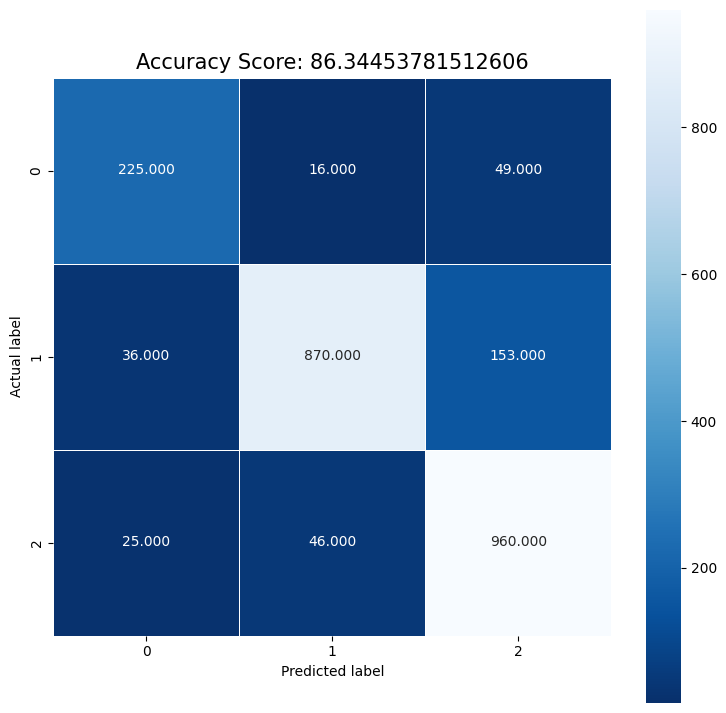

In [21]:
# plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format((metrics.accuracy_score(y_test, y_pred))*100)
plt.title(all_sample_title, size=15)

In [22]:
# plot the classification report

cr = metrics.classification_report(y_test, y_pred, output_dict=True)
cr_df = pd.DataFrame(cr).transpose()
cr_df

,precision,recall,f1-score,support
Negative,0.786713,0.775862,0.781250,290.000000
Neutral,0.933476,0.821530,0.873933,1059.000000
Positive,0.826162,0.931135,0.875513,1031.000000
accuracy,0.863445,0.863445,0.863445,0.863445
macro avg,0.848784,0.842842,0.843565,2380.000000
weighted avg,0.869106,0.863445,0.863324,2380.000000


# Logistic Regression

In [23]:
# train the model without MultinomialNB
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\usmar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [24]:
# predict the model
y_pred = model.predict(X_test)

In [25]:
# print the accuracy
logistic_regression_accuracy = metrics.accuracy_score(y_test, y_pred)*100
print('Accuracy of Logistic Regression model is: ', logistic_regression_accuracy)

Accuracy of Logistic Regression model is:  93.40336134453781


In [26]:
# print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[ 231   42   17]
 [   9 1027   23]
 [   6   60  965]]


In [27]:
# print the classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.94      0.80      0.86       290
     Neutral       0.91      0.97      0.94      1059
    Positive       0.96      0.94      0.95      1031

    accuracy                           0.93      2380
   macro avg       0.94      0.90      0.92      2380
weighted avg       0.94      0.93      0.93      2380



Text(0.5, 1.0, 'Accuracy Score: 93.40336134453781')

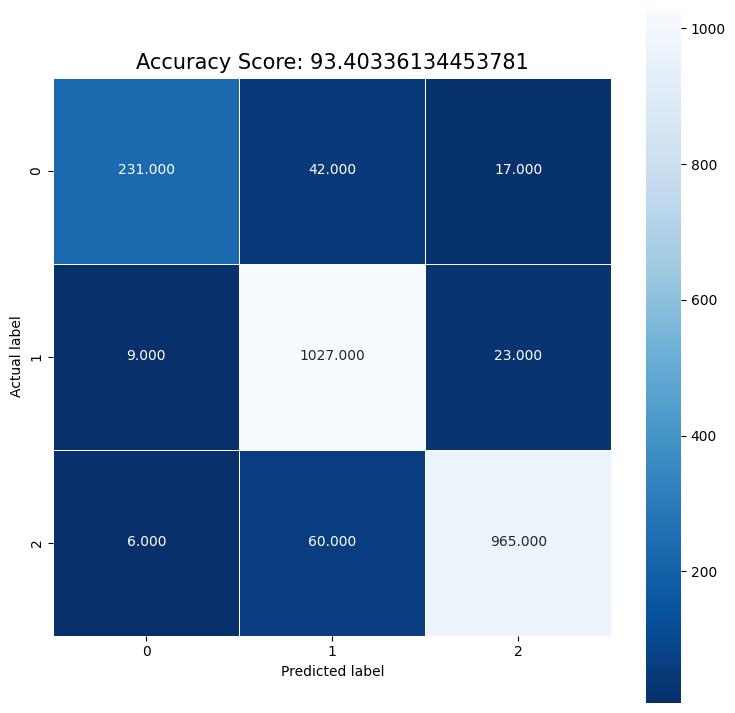

In [28]:
# plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5,
            square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format((metrics.accuracy_score(y_test, y_pred))*100)
plt.title(all_sample_title, size=15)

In [29]:
# plot the classification report

cr = metrics.classification_report(y_test, y_pred, output_dict=True)
cr_df = pd.DataFrame(cr).transpose()
cr_df

,precision,recall,f1-score,support
Negative,0.939024,0.796552,0.861940,290.000000
Neutral,0.909655,0.969783,0.938757,1059.000000
Positive,0.960199,0.935984,0.947937,1031.000000
accuracy,0.934034,0.934034,0.934034,0.934034
macro avg,0.936293,0.900773,0.916211,2380.000000
weighted avg,0.935129,0.934034,0.933374,2380.000000


# Tf-Idf Vectorization-Based Models

In [30]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=40)

In [31]:
# vectorize the data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [32]:
# train the model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [33]:
# predict the model
y_pred = model.predict(X_test)

In [34]:
# print the accuracy
naive_bayes_accuracy_tf_idf = metrics.accuracy_score(y_test, y_pred)*100
print('Accuracy of Naive Bayes model with TF-IDF is: ', naive_bayes_accuracy_tf_idf)

Accuracy of Naive Bayes model with TF-IDF is:  84.45378151260505


In [35]:
# print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[133  70  87]
 [  4 920 135]
 [  0  74 957]]


In [36]:
# print the classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.97      0.46      0.62       290
     Neutral       0.86      0.87      0.87      1059
    Positive       0.81      0.93      0.87      1031

    accuracy                           0.84      2380
   macro avg       0.88      0.75      0.79      2380
weighted avg       0.85      0.84      0.84      2380



Text(0.5, 1.0, 'Accuracy Score: 84.45378151260505')

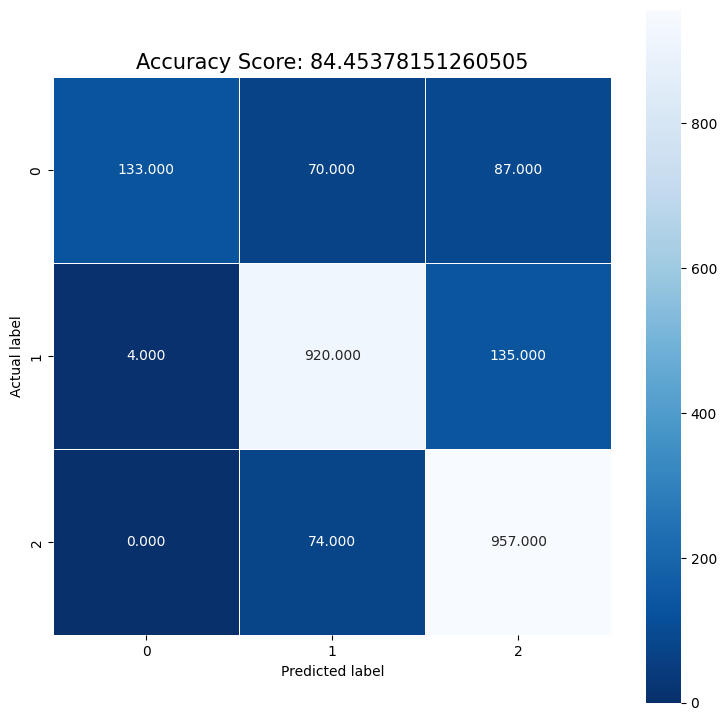

In [37]:
# plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format((metrics.accuracy_score(y_test, y_pred))*100)
plt.title(all_sample_title, size=15)

In [38]:
# plot the classification report

cr = metrics.classification_report(y_test, y_pred, output_dict=True)
cr_df = pd.DataFrame(cr).transpose()
cr_df

,precision,recall,f1-score,support
Negative,0.970803,0.458621,0.622951,290.000000
Neutral,0.864662,0.868744,0.866698,1059.000000
Positive,0.811705,0.928225,0.866063,1031.000000
accuracy,0.844538,0.844538,0.844538,0.844538
macro avg,0.882390,0.751863,0.785237,2380.000000
weighted avg,0.854654,0.844538,0.836723,2380.000000


# Support Vector Machine

In [39]:
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [40]:
# predict the model
y_pred = model.predict(X_test)

In [41]:
# print the accuracy
svm_accuracy = metrics.accuracy_score(y_test, y_pred)*100
print('Accuracy of SVM model is: ', svm_accuracy)

Accuracy of SVM model is:  92.73109243697479


In [42]:
# print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[ 229   33   28]
 [   7 1016   36]
 [   6   63  962]]


In [43]:
# print the classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.95      0.79      0.86       290
     Neutral       0.91      0.96      0.94      1059
    Positive       0.94      0.93      0.94      1031

    accuracy                           0.93      2380
   macro avg       0.93      0.89      0.91      2380
weighted avg       0.93      0.93      0.93      2380



Text(0.5, 1.0, 'Accuracy Score: 92.73109243697479')

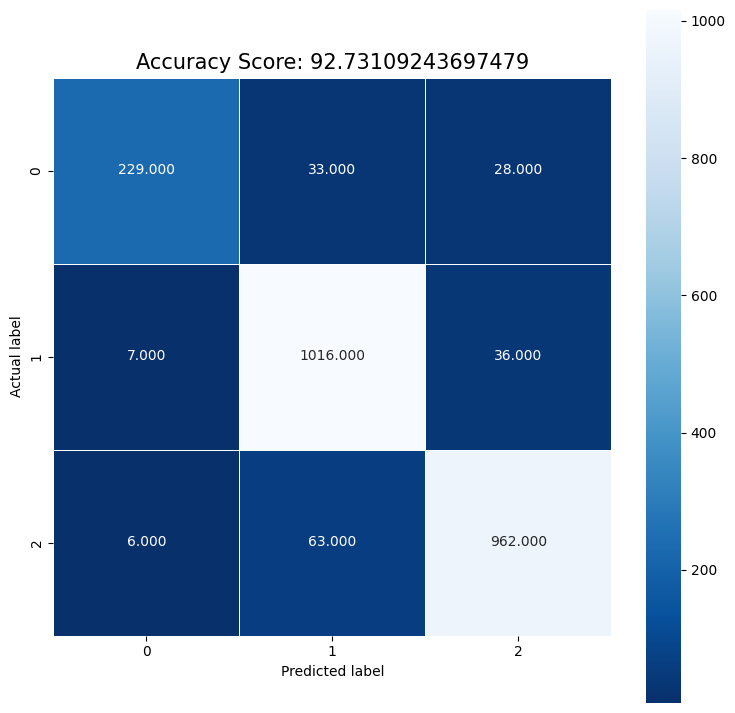

In [44]:
# plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format((metrics.accuracy_score(y_test, y_pred))*100)
plt.title(all_sample_title, size=15)

In [45]:
# plot the classification report

cr = metrics.classification_report(y_test, y_pred, output_dict=True)
cr_df = pd.DataFrame(cr).transpose()
cr_df

,precision,recall,f1-score,support
Negative,0.946281,0.789655,0.860902,290.000000
Neutral,0.913669,0.959396,0.935974,1059.000000
Positive,0.937622,0.933075,0.935343,1031.000000
accuracy,0.927311,0.927311,0.927311,0.927311
macro avg,0.932524,0.894042,0.910740,2380.000000
weighted avg,0.928019,0.927311,0.926553,2380.000000


# Comparing the Models

In [46]:
# compare the accuracy of the models
models = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 'Naive Bayes with Tf-Idf', 'SVM'],
    'Score': [naive_bayes_accuracy, logistic_regression_accuracy, naive_bayes_accuracy_tf_idf, svm_accuracy]
})
models.sort_values(by='Score', ascending=False)

# plot the accuracy of the models using plotly
fig = px.bar(models, x='Model', y='Score', color='Score', height=400)
fig.show()

# Visualizing the Results

In [47]:
# visualize the sentiment of the tweets using plotly
fig = px.histogram(df , x="Sentiment", color="Sentiment", barmode="group")
fig.show( )

In [48]:
# visualize the sentiment of the tweets using plotly with facet_col and facet_row and animation_frame
fig = px.histogram(df , x="Sentiment", color="Sentiment", barmode="group", facet_col="Sentiment", facet_row="Sentiment")
fig.show()

In [49]:
df.head()

,user_name,tweet_id,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,Text,hashtags,source,is_retweet,word,Datetime,Sentiment
0,Drillz,1.640760e+18,"Lagos, Nigeria",NaN,2022-10-22 22:53:41+00:00,200,910,17676,False,2023-03-28 17:10:01+00:00,dubai abaya price sizes available for pickup ...,NaN,Twitter for iPhone,False,dubai,2023-03-28,Positive
1,Herma Hulda,1.640760e+18,NaN,NaN,2023-02-25 22:30:34+00:00,13,22,0,False,2023-03-28 17:09:54+00:00,let there be light another day another univer...,NaN,Twitter Web App,False,dubai,2023-03-28,Positive
2,𝐌𝐈𝐂𝐇𝐀𝐄𝐋𝐈𝐆𝐄𝐍𝐂𝐄,1.640760e+18,NaN,"Walking ambition, pure pleasure lover, dreamer.",2018-07-21 18:42:42+00:00,2788,2802,55854,False,2023-03-28 17:09:49+00:00,ya fav dubai lexus rx seater clean title gcc ...,NaN,Twitter for Android,False,dubai,2023-03-28,Positive
3,Kaliya,1.640760e+18,"Bilbao, Spain",*****************,2010-03-28 06:10:36+00:00,1139,3807,48604,False,2023-03-28 17:09:49+00:00,bolsonaro is hiding in us after fleeing from ...,NaN,Twitter for iPhone,False,dubai,2023-03-28,Negative
4,Charehwa,1.640760e+18,NaN,NaN,2021-11-04 15:50:54+00:00,347,795,5436,False,2023-03-28 17:09:46+00:00,zed koudonaris smelts gold stock in zim sells...,NaN,Twitter for Android,False,dubai,2023-03-28,Neutral


In [50]:
df.word.unique()

array(['dubai', 'uae', 'd33', 'D33', 'Dubai2023'], dtype=object)

In [51]:
#dubai and uae replace as 1 and if not dubai and uae replace 0
df['word'] = df['word'].apply(lambda x: 1 if x == 'dubai' or x == 'uae' or x=='Dubai2023' else 0)
df['word'].unique()

array([1, 0], dtype=int64)

In [52]:
df.head()

,user_name,tweet_id,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,Text,hashtags,source,is_retweet,word,Datetime,Sentiment
0,Drillz,1.640760e+18,"Lagos, Nigeria",NaN,2022-10-22 22:53:41+00:00,200,910,17676,False,2023-03-28 17:10:01+00:00,dubai abaya price sizes available for pickup ...,NaN,Twitter for iPhone,False,1,2023-03-28,Positive
1,Herma Hulda,1.640760e+18,NaN,NaN,2023-02-25 22:30:34+00:00,13,22,0,False,2023-03-28 17:09:54+00:00,let there be light another day another univer...,NaN,Twitter Web App,False,1,2023-03-28,Positive
2,𝐌𝐈𝐂𝐇𝐀𝐄𝐋𝐈𝐆𝐄𝐍𝐂𝐄,1.640760e+18,NaN,"Walking ambition, pure pleasure lover, dreamer.",2018-07-21 18:42:42+00:00,2788,2802,55854,False,2023-03-28 17:09:49+00:00,ya fav dubai lexus rx seater clean title gcc ...,NaN,Twitter for Android,False,1,2023-03-28,Positive
3,Kaliya,1.640760e+18,"Bilbao, Spain",*****************,2010-03-28 06:10:36+00:00,1139,3807,48604,False,2023-03-28 17:09:49+00:00,bolsonaro is hiding in us after fleeing from ...,NaN,Twitter for iPhone,False,1,2023-03-28,Negative
4,Charehwa,1.640760e+18,NaN,NaN,2021-11-04 15:50:54+00:00,347,795,5436,False,2023-03-28 17:09:46+00:00,zed koudonaris smelts gold stock in zim sells...,NaN,Twitter for Android,False,1,2023-03-28,Neutral


In [53]:
#count month in Datetime
df['Datetime'].unique()

array([datetime.date(2023, 3, 28), datetime.date(2023, 3, 27),
       datetime.date(2023, 3, 26), datetime.date(2023, 3, 25),
       datetime.date(2023, 3, 24), datetime.date(2023, 3, 23),
       datetime.date(2023, 3, 22), datetime.date(2023, 3, 21),
       datetime.date(2023, 3, 20), datetime.date(2023, 3, 19)],
      dtype=object)

<Axes: xlabel='Datetime'>

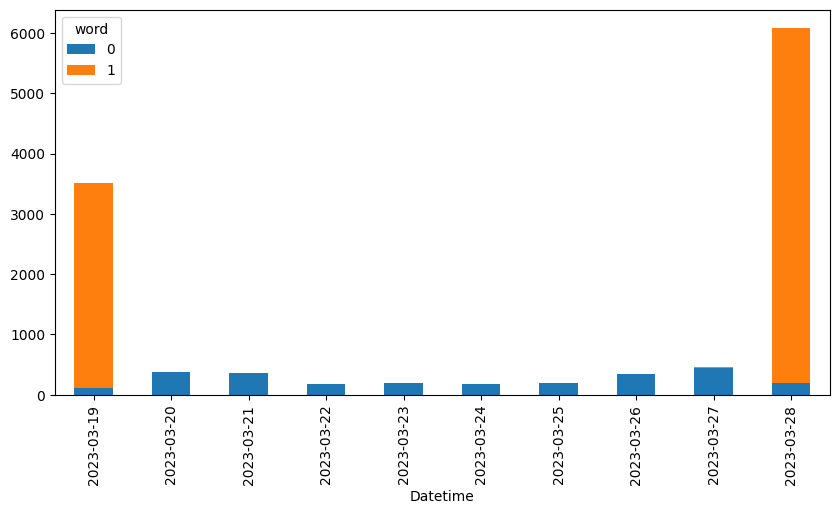

In [54]:
#compare Datetime and word
df.groupby(['Datetime','word']).size().unstack().plot(kind='bar',stacked=True,figsize=(10,5))

<Axes: xlabel='Datetime'>

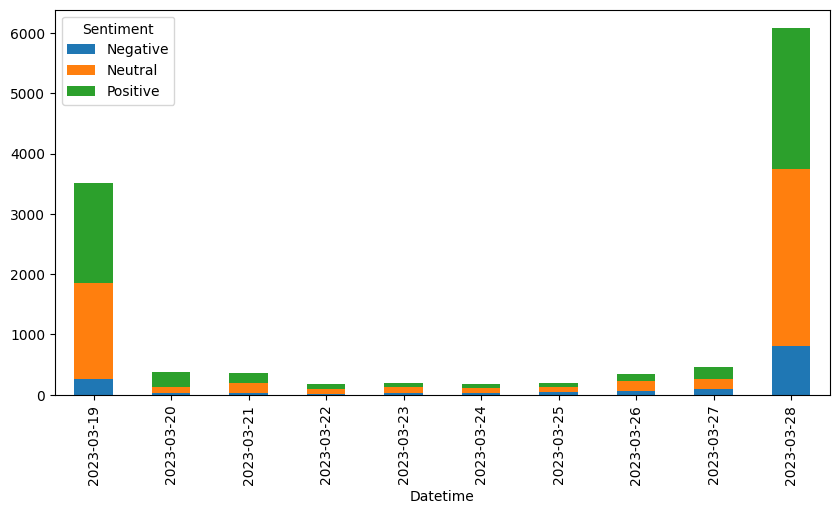

In [55]:
#compare Datetime and Sentiment
df.groupby(['Datetime','Sentiment']).size().unstack().plot(kind='bar',stacked=True,figsize=(10,5))
    

In [56]:
#use plotly to compare Datetime and word
fig = px.histogram(df , x="Datetime", color="word", barmode="group", facet_col="word", facet_row="word")
fig.show()


In [57]:
#use plotly to compare Datetime and Sentiment
fig = px.histogram(df , x="Datetime", color="Sentiment", barmode="group", facet_col="Sentiment", facet_row="Sentiment")
fig.show()

# Word Cloud visualization
    

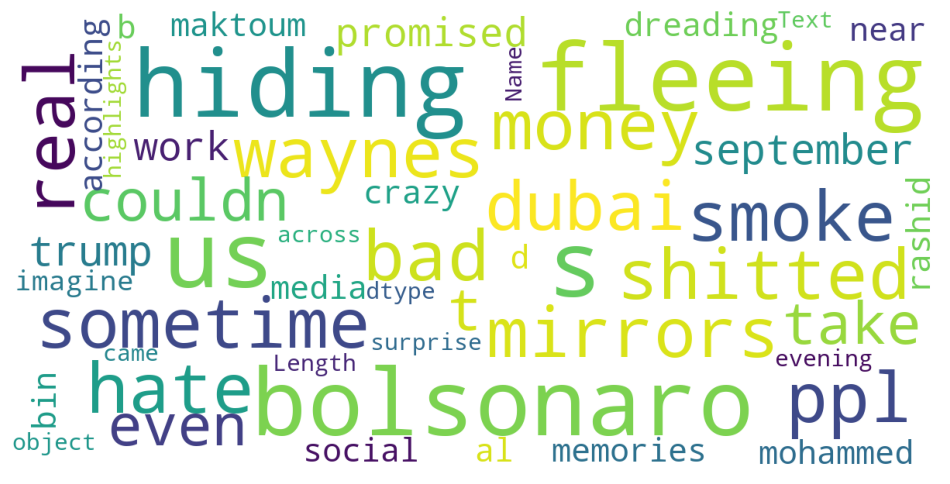

In [58]:
# visualize using wordcloud for negative sentiments
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=200,
    max_font_size=40,
    scale=3,
    random_state=1
).generate(str(df[df['Sentiment'] == 'Negative']['Text']))
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()


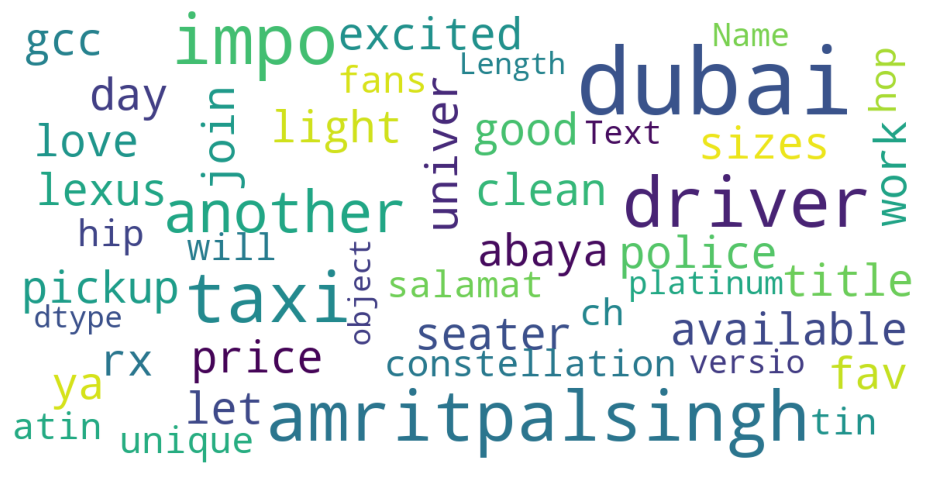

In [59]:
# visualize using wordcloud for Positive sentiments
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=200,
    max_font_size=40,
    scale=3,
    random_state=1
).generate(str(df[df['Sentiment'] == 'Positive']['Text']))
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()


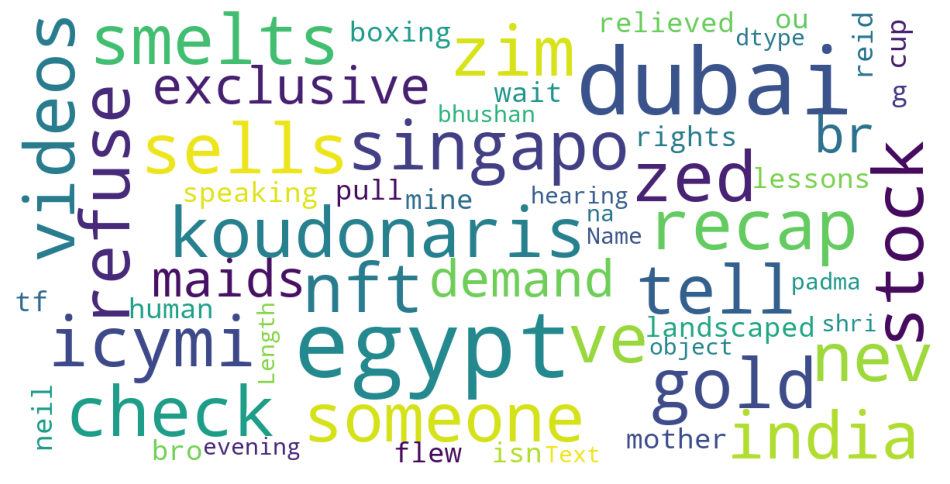

In [60]:
# visualize using wordcloud for Neutral sentiments
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=200,
    max_font_size=40,
    scale=3,
    random_state=1
).generate(str(df[df['Sentiment'] == 'Neutral']['Text']))
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()
